In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
df = pd.read_csv("medical_examination.csv")

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
**Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.**
Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile
Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

**Agrego la columna "sobrepeso"** OKAY

In [3]:
BMI = df.weight / (df.height / 100) ** 2

overweight = BMI > 25
overweight[overweight == True] = 1
overweight[overweight == False] = 0

# Hasta la sentencia anterior, la variable overweight era de tipo OBJECT (?). Por lo tanto, la convertí
# a enteros!!!

overweight = np.asarray(overweight, dtype=int)

df["overweight"] = overweight

**Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.** OKAY (In dataframe dfB, ver mas abajo)

In [4]:
# OJO QUE TODO ESTO NO ESTÁ CREANDO UNA COPIA DE LA COLUMNA 'GLUC'. SE ESTA REFIRIENDO AL MISMO OBJETO
# POR LO CUAL ESTÁ MODIFICANDO DIRECTAMENTE EL DATA FRAME!!! OJOOOO

# A=pd.Series(df['gluc'])
# print(A, type(A))
# A[A==1] = 0

# LA FORMA CORRECTA DE HACER UNA COPIA ES LA SIGUIENTE

# To avoid overwriting I make a copy of the DATA FRAME
dfB = copy.deepcopy(df)

gluc = copy.deepcopy(df["gluc"])
# gluc is df['gluc']

# Now I modify the values of 'gluc' previous to add them to de dataframe dfB
gluc[gluc == 1] = 0
gluc[gluc > 1] = 1
dfB["gluc"] = gluc

# I follow the same logic for column CHOLESTEROL
chol = copy.deepcopy(df["cholesterol"])
chol[chol == 1] = 0
chol[chol > 1] = 1
dfB["cholesterol"] = chol

In [5]:
print(df.shape, dfB.shape) # HASTA ACA TODO BIEN YA QUE LOS SHAPES NO TIENEN PORQUÉ MODIFICARSE (70000,14)

(70000, 14) (70000, 14)


In [6]:
# dfB['gluc'] != df['gluc'] #Asi verifico que los valores fueron efectivamente cambiados
# dfB['cholesterol'] != df['cholesterol']

Ahora tengo el dataframe dfB, el cual ha sido modificado. Se agregó la columna overweight
y se normalizaron las variables categoricas gluc y cholesterol

**Lo siguiente es convertir la tabla de un wide format a un long format** 
Lo cual se hace utilizando el metodo **pd.melt**. Esto genera un data frame mas estirado, por decirlo de alguna manera

/home/adrieto/.virtualenvs/reactord/lib/python3.10/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


False


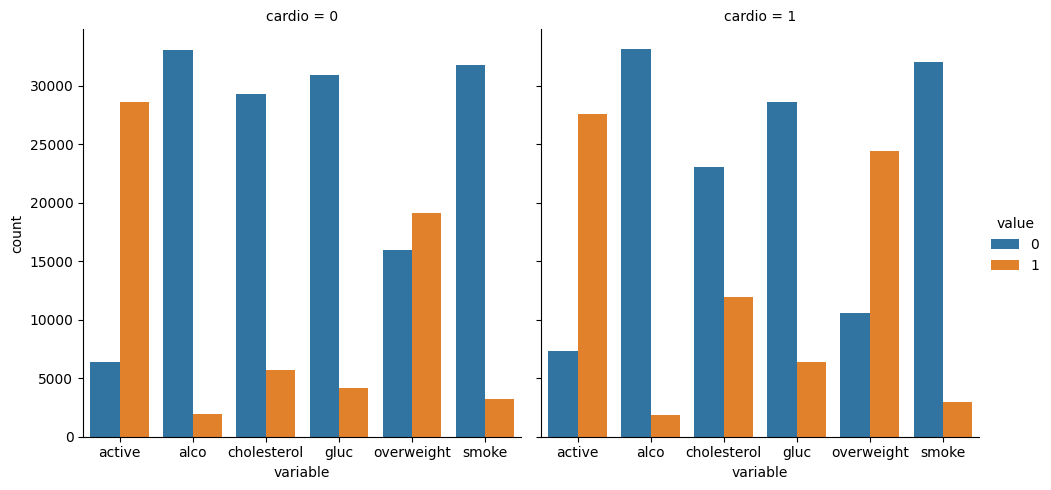

In [7]:
dfB_long = pd.melt(
    dfB,
    id_vars="cardio",
    value_vars=["cholesterol", "gluc", "alco", "smoke", "active", "overweight"],
)

for col in ["cardio", "variable"]:
    dfB_long[col] = dfB_long[col].astype("category")

fig = plt.figure()
ax1 = fig.add_subplot(111)
g = sns.catplot(
    x="variable",
    col="cardio",
    data=dfB_long,
    hue="value",
    kind="count",
    orient="v",
    ax=ax1,
)
plt.close(1)
# plt.tight_layout()
print(ax1.get_xlabel == "variable")

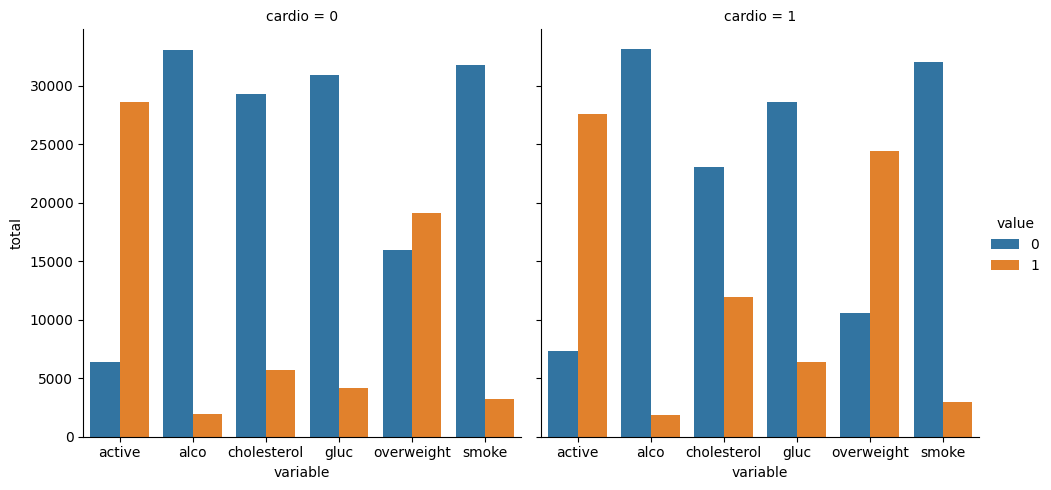

In [8]:
def draw_cat_plot(dfB):
    dfB_long = pd.melt(
        dfB,
        id_vars="cardio",
        value_vars=["cholesterol", "gluc", "alco", "smoke", "active", "overweight"],
    )

    for col in ["cardio", "variable"]:
        dfB_long[col] = dfB_long[col].astype("category")

    g = sns.catplot(
        x="variable", col="cardio", data=dfB_long, hue="value", kind="count", orient="v"
    )
    g.set_axis_labels("variable", "total")
    fig = g
    fig.savefig("catplotLORO.png")


draw_cat_plot(dfB)

**Clean the data.** Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [9]:
# df.info()
# df['ap_lo'] <= df['ap_hi'])
dfB.shape

(70000, 14)

In [10]:
# Guardo los cambios en el dataframe dfB. Con el metodo shape, puedo ir controlando que el dataframe
# se modifica, es decir que tiene menos lineas ya que el original (df) es de 70000 x 14

In [11]:
df_presion = dfB[dfB["ap_lo"] <= dfB["ap_hi"]]
df_presion = df_presion[(df_presion["height"] >= df_presion["height"].quantile(0.025)) 
                & (df_presion["height"] <= df_presion["height"].quantile(0.975))
                & (df_presion["weight"] >= df_presion["weight"].quantile(0.025))
                & (df_presion["weight"] <= df_presion["weight"].quantile(0.975))
                ]

print(df_presion.shape)#, dfAux1.shape, dfAux2.shape, df_presion.shape)

(63126, 14)


In [76]:
corr_matrix = df_presion.corr()
    #corr_matrix = np.round(corr_matrix, 1)
       
# We create a mask, to not display some squares
upper_triangle = np.triu(corr_matrix)

#Now we adjust the values
upper_triangle = np.round(upper_triangle,1)
corr_matrix = np.round(corr_matrix,1)

for row_idx, row in enumerate(upper_triangle):
    for col_idx, col in enumerate(row):
        if col == 0. :
            upper_triangle[row_idx,col_idx] = 0.0
           
        elif col == -0.:
            upper_triangle[row_idx,col_idx] = -0.0
            print("TOY")
        else:
            pass

#print (upper_triangle)

A = np.array ([[1,2,3],[4,5,6]])
#print(A.shape, A)

for row_idx, row in enumerate(A):
    for col_idx, col in enumerate (row):
        if A[row_idx,col_idx] >= 2:
            A[row_idx,col_idx] = 10

         
    

TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY
TOY


**Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.**

In [12]:
# First we create the correlation matrix
corr_matrix = df_presion.corr()

# We create a mask, to not display some squares

upper_triangle = np.triu(corr_matrix)

# A mask can also be created like this. But this way, the graph in the next cell appeared blank
"""#len(corr_matrix.columns)
mask= []
for i in range (len(corr_matrix.columns)):
    mask_i = []
    for j in range (len(corr_matrix.columns)):
        if j>i:
            mask_i.append(True)
        else:
            mask_i.append(False)
    mask.append(mask_i)

(mask[1][0])"""

'#len(corr_matrix.columns)\nmask= []\nfor i in range (len(corr_matrix.columns)):\n    mask_i = []\n    for j in range (len(corr_matrix.columns)):\n        if j>i:\n            mask_i.append(True)\n        else:\n            mask_i.append(False)\n    mask.append(mask_i)\n\n(mask[1][0])'

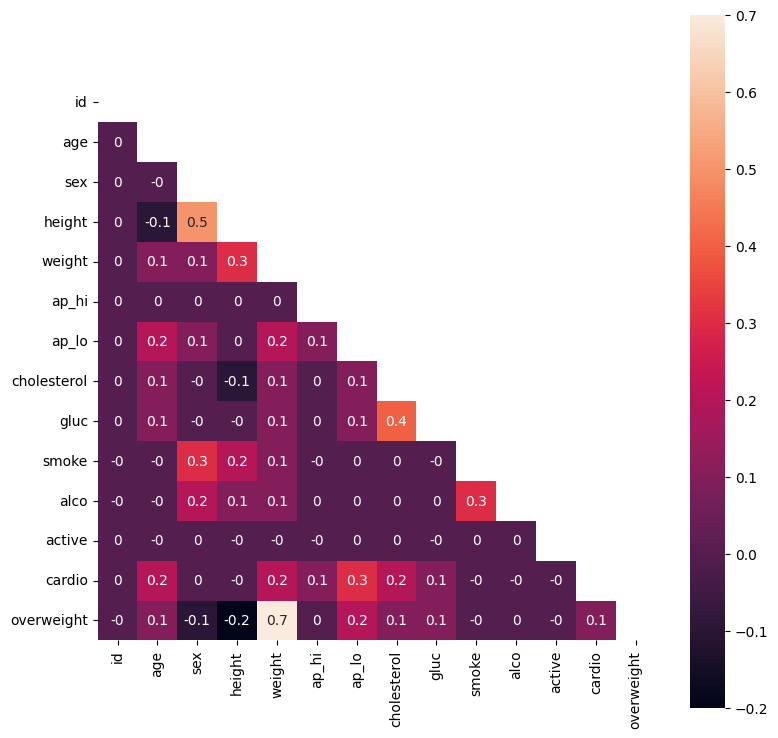

In [13]:
# Creamos una nueva figura con Matplotlib y seteamos el tamaño:
fig = plt.gcf()
fig.set_size_inches(9, 9)
sns.heatmap(np.round(corr_matrix, 1), mask=upper_triangle, annot=True, square=True);
# The numbers were rounded to the first decimal place

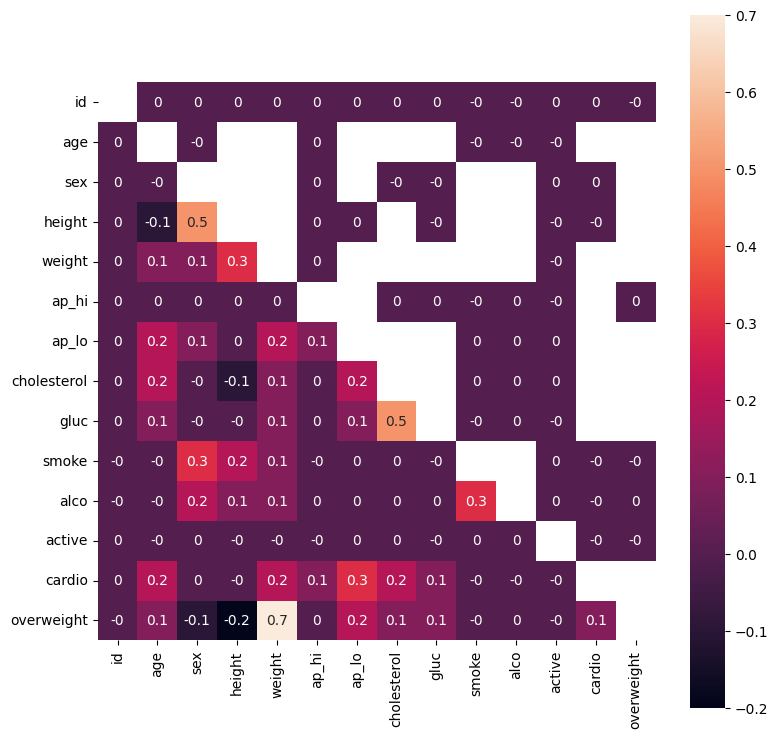

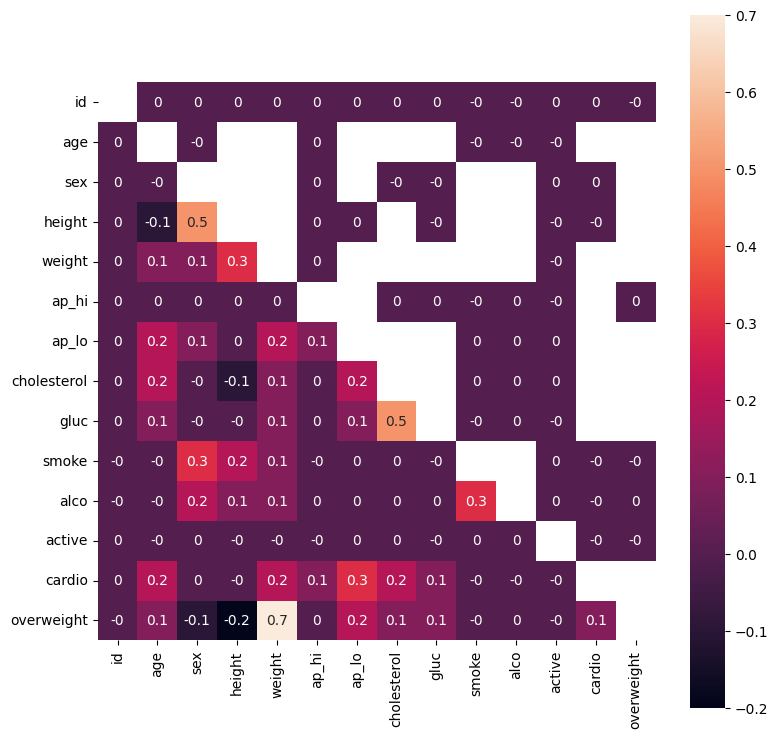

In [32]:
def draw_heat_map():
    # Acomodo la alturab. OJO que si empiezo a correr esto sucesivas veces,
    # el dataframe se achica cada vez mas!!

    df_presion = df[df["ap_lo"] <= df["ap_hi"]]
    df_presion = df_presion[
                  (df_presion["height"] >= df_presion["height"].quantile(0.025)) 
                & (df_presion["height"] <= df_presion["height"].quantile(0.975))
                & (df_presion["weight"] >= df_presion["weight"].quantile(0.025))
                & (df_presion["weight"] <= df_presion["weight"].quantile(0.975))
                ]

    # First we create the correlation matrix
    corr_matrix = df_presion.corr()
    #corr_matrix = np.round(corr_matrix, 1)
       
    # We create a mask, to not display some squares
    upper_triangle = np.triu(corr_matrix)

    #Now we adjust the values
    upper_triangle = np.round(upper_triangle,1)
    corr_matrix = np.round(corr_matrix,1)

    #print(corr_matrix.head())
    #print(upper_triangle)

    # Creamos una nueva figura con Matplotlib y seteamos el tamaño:
    fig = plt.figure()
    fig.set_size_inches(9, 9)
    sns.heatmap(np.round(corr_matrix,1), mask=upper_triangle, annot=True, square=True)
    # The numbers were rounded to the first decimal place

    fig.savefig("heatmap.png")
    return fig

draw_heat_map()

In [15]:
print(float(5))

5.0


## ACA ABAJO SON TODAS PRUEBAS NUEVAS...

In [16]:
dfB_long = pd.melt(
    dfB,
    id_vars="cardio",
    value_vars=["cholesterol", "gluc", "alco", "smoke", "active", "overweight"],
)

for col in ["cardio", "variable"]:
    dfB_long[col] = dfB_long[col].astype("category")

# fig = plt.figure()
# ax1 = fig.add_subplot(121)
# g = sns.catplot(x="variable", col="cardio", data= dfB_long, hue="value", kind= 'count', orient= "v", ax=ax1)

dfB_long.head()
# ax.set_axis_labels("variable", "total")
# fig.savefig("catplotLORO.png")

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [65]:
A = np.array ([[1,2,3],[4,5,6]])
#print(A.shape, A)

for row in A:
    for col in row:
        print (col) 

1
2
3
4
5
6
